In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Hotel Bookings.csv")
df = df.drop_duplicates()

hotel_df = df[['hotel','is_canceled','adults','children', 'babies','meal', 'arrival_date_year','arrival_date_month',\
               'arrival_date_day_of_month','adr','country', 'market_segment','distribution_channel','lead_time','required_car_parking_spaces']]

- We read our dataset, removed the duplicate content and put it in the dataframe.

In [3]:
hotel_df[hotel_df['market_segment'] == 'Undefined'] = np.nan
hotel_df[hotel_df['distribution_channel'] == 'Undefined'] = np.nan
hotel_df[hotel_df['meal'] == 'Undefined'] = np.nan

hotel_df = hotel_df.dropna()

# hotel_df['hotel'] = hotel_df['is_canceled'].astype('category')
# hotel_df['is_canceled'] = hotel_df['is_canceled'].astype('bool')
# hotel_df['required_car_parking_spaces'] = hotel_df['required_car_parking_spaces'].astype('bool')
# hotel_df['country'] = hotel_df['country'].astype('category')

hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86451 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        86451 non-null  object 
 1   is_canceled                  86451 non-null  float64
 2   adults                       86451 non-null  float64
 3   children                     86451 non-null  float64
 4   babies                       86451 non-null  float64
 5   meal                         86451 non-null  object 
 6   arrival_date_year            86451 non-null  float64
 7   arrival_date_month           86451 non-null  object 
 8   arrival_date_day_of_month    86451 non-null  float64
 9   adr                          86451 non-null  float64
 10  country                      86451 non-null  object 
 11  market_segment               86451 non-null  object 
 12  distribution_channel         86451 non-null  object 
 13  lead_time           

/tmp/ipykernel_13648/1206978563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df[hotel_df['market_segment'] == 'Undefined'] = np.nan
/tmp/ipykernel_13648/1206978563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df[hotel_df['distribution_channel'] == 'Undefined'] = np.nan
/tmp/ipykernel_13648/1206978563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

- In this step, we try to clean our data.

---
# <FONT COLOR="ga3b6f9"> Question: <FONT/>

### <FONT COLOR="ga3b6f9"> 1.There are two types of hotels in the dataset, which type of hotels booked most? Plot a pie chart to show the results. <FONT/>

In [4]:
n_hotel = hotel_df['hotel'].value_counts()
n_hotel

hotel
City Hotel      53418
Resort Hotel    33033
Name: count, dtype: int64

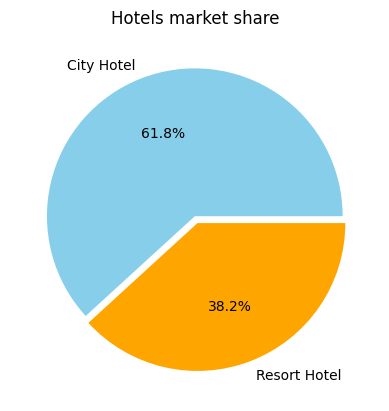

In [5]:
plt.figure()

plt.pie(n_hotel.values, labels=n_hotel.index, autopct='%1.1f%%', colors=['skyblue','orange'], explode=[0, 0.05])
plt.title('Hotels market share')

plt.show()

City hotels are more booked, so it has more customers. their have **61.8%** of market against resort hotels!

### <FONT COLOR="ga3b6f9"> 2.What percentage of bookings were cancelled? What type of chart do you suggest to show the results? <FONT/>

In [6]:
n_canceled = hotel_df['is_canceled'].sum()
canceled_percentage = n_canceled / hotel_df['is_canceled'].size
canceled_percentage


0.2765150200691721

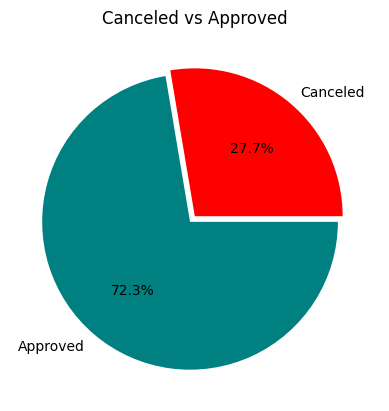

In [7]:
plt.figure()

plt.pie([canceled_percentage, 1-canceled_percentage], labels=['Canceled', 'Approved'], colors=['red', '#008080'], autopct='%1.1f%%', explode=[0, 0.05])
plt.title("Canceled vs Approved")

plt.show()

**27.7%** have canceled their reservations, that  about is **1** out of every **4** people!

### <FONT COLOR="ga3b6f9"> 3.Based on different hotel types, what percentage of bookings were cancelled? What type of chart do you suggest to show the results? <FONT/>


In [8]:
cancelled_by_hotel = hotel_df.groupby('hotel')['is_canceled'].sum() / hotel_df['hotel'].value_counts()
cancelled_by_hotel

hotel
City Hotel      0.300292
Resort Hotel    0.238065
dtype: float64

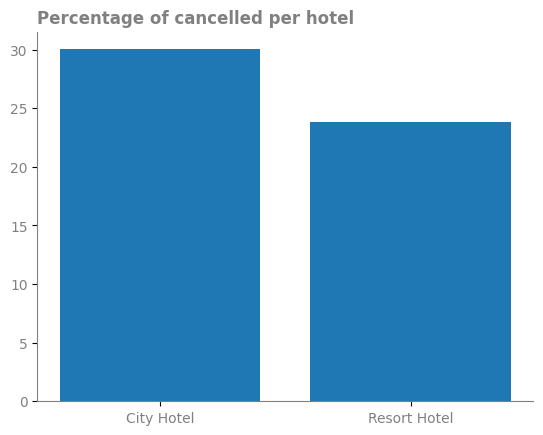

In [9]:
plt.figure()

plt.bar(cancelled_by_hotel.index, cancelled_by_hotel.values*100)

plt.title('Percentage of cancelled per hotel',color='gray', loc='left', fontdict={'weight':'bold'})

plt.xticks(color='gray')
plt.yticks(color='gray')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().spines[['bottom', 'left']].set_color('gray')

plt.show()

Customers usually cancel **30** and **23** percent of their reservations in city and resort hotels, respectively!

### <FONT COLOR="ga3b6f9"> 4.In different years, what type of hotels were booked most and booked least? Draw a proper countplot to show the results. <FONT/>


In [10]:
hotel_booked = hotel_df.groupby(['arrival_date_year', 'hotel'])['arrival_date_month'].count().reset_index()
hotel_booked


,arrival_date_year,hotel,arrival_date_month
0,2015.0,City Hotel,6544
1,2015.0,Resort Hotel,6606
2,2016.0,City Hotel,26756
3,2016.0,Resort Hotel,15152
4,2017.0,City Hotel,20118
5,2017.0,Resort Hotel,11275


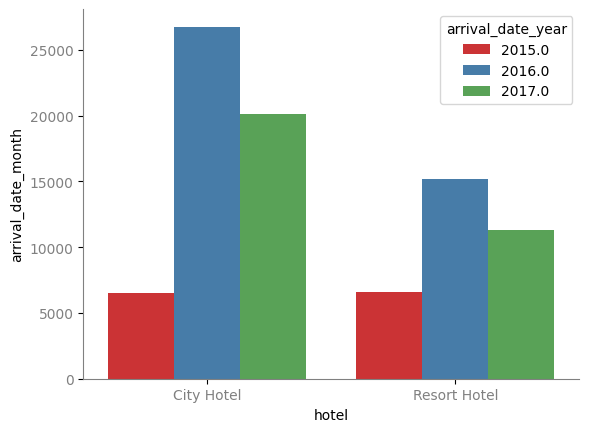

In [11]:
plt.figure()

sns.barplot(x=hotel_booked['hotel'],y=hotel_booked['arrival_date_month'], hue=hotel_booked['arrival_date_year'], palette='Set1')

plt.xticks(color='gray')
plt.yticks(color='gray')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().spines[['bottom', 'left']].set_color('gray')

plt.show()

In 2015, resort hotels were booked more a bit than city hotels, but after that in 2016 and 2017 city hotels had more reservations by a wide margin!

### <FONT COLOR="ga3b6f9"> 5.According to different hotel types, how ‘adr’ changes in different months?<FONT/>


- **Description:** ADR means average daily rate which is defined by the average income per occupied room your hotel makes in a set period of time.

In [12]:
adr_changes = hotel_df.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
adr_changes

,hotel,arrival_date_month,adr
0,City Hotel,April,117.179317
1,City Hotel,August,124.959458
2,City Hotel,December,92.748112
3,City Hotel,February,88.945304
4,City Hotel,January,85.092612
5,City Hotel,July,120.055385
6,City Hotel,June,123.836342
7,City Hotel,March,94.763375
8,City Hotel,May,127.851240
9,City Hotel,November,89.485886


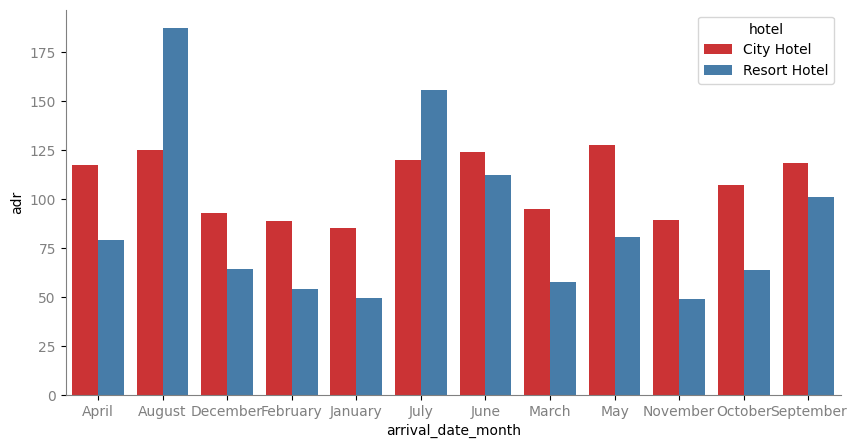

In [13]:
plt.figure(figsize=(10,5))

sns.barplot(x=adr_changes['arrival_date_month'],y=adr_changes['adr'], hue=adr_changes['hotel'], palette='Set1')

plt.xticks(color='gray')
plt.yticks(color='gray')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().spines[['bottom', 'left']].set_color('gray')

plt.show()

At the most of the year, city hotels have more adr rate than resort hotels excepet auguest and july!

### <FONT COLOR="ga3b6f9"> 6.Check hotel wise daily rates mean, standard deviation, median, min and max. <FONT/>


In [14]:
hotel_df.describe()

,is_canceled,adults,children,babies,arrival_date_year,arrival_date_day_of_month,adr,lead_time,required_car_parking_spaces
count,86451.000000,86451.000000,86451.000000,86451.000000,86451.000000,86451.000000,86451.000000,86451.000000,86451.000000
mean,0.276515,1.879088,0.139351,0.010723,2016.211021,15.814508,106.578571,80.140380,0.083400
std,0.447277,0.626198,0.457092,0.113163,0.686087,8.835020,54.855799,86.124211,0.280351
min,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,-6.380000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,2016.000000,8.000000,72.250000,12.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,2016.000000,16.000000,98.600000,50.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,2017.000000,23.000000,134.100000,125.000000,0.000000
max,1.000000,55.000000,10.000000,10.000000,2017.000000,31.000000,5400.000000,737.000000,8.000000


The interesting point that can be obtained from this information is that people usually book a room for two people and go on a trip. In the most numerous hotel reservation, we see the presence of 55 people who are probably a sports team or a student camp!

### <FONT COLOR="ga3b6f9"> 7.Extract the number of bookings per country and investigate that most of the guests are from which countries? <FONT/>


In [15]:
country_code_df = pd.read_csv('../data/Country Codes.csv')

In [16]:
hotel_by_country = hotel_df.groupby('country')['hotel'].count().sort_values(ascending=False).reset_index()

pd.merge(hotel_by_country, country_code_df, left_on='country', right_on='alpha-3', how='left')


,country,hotel,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,PRT,27181,Portugal,PT,PRT,620.0,ISO 3166-2:PT,Europe,Southern Europe,NaN,150.0,39.0,NaN
1,GBR,10415,United Kingdom of Great Britain and Northern I...,GB,GBR,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,FRA,8768,France,FR,FRA,250.0,ISO 3166-2:FR,Europe,Western Europe,NaN,150.0,155.0,NaN
3,ESP,7162,Spain,ES,ESP,724.0,ISO 3166-2:ES,Europe,Southern Europe,NaN,150.0,39.0,NaN
4,DEU,5386,Germany,DE,DEU,276.0,ISO 3166-2:DE,Europe,Western Europe,NaN,150.0,155.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,MDG,1,Madagascar,MG,MDG,450.0,ISO 3166-2:MG,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
173,LCA,1,Saint Lucia,LC,LCA,662.0,ISO 3166-2:LC,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
174,KIR,1,Kiribati,KI,KIR,296.0,ISO 3166-2:KI,Oceania,Micronesia,NaN,9.0,57.0,NaN
175,PYF,1,French Polynesia,PF,PYF,258.0,ISO 3166-2:PF,Oceania,Polynesia,NaN,9.0,61.0,NaN


Most of the bookings and guests are from European countries such as **Portugal, Great Britain, France, Spain and Germany!**

### <FONT COLOR="ga3b6f9"> 8.According to the ‘market_segment’ most of the guests book their rooms on what channels? <FONT/>


In [17]:
channels = hotel_df.groupby(['market_segment','distribution_channel'] )['hotel'].count().reset_index()
channels.rename(columns={'hotel':'counts'}, inplace=True)
channels.sort_values('counts', ascending=False)

,market_segment,distribution_channel,counts
22,Online TA,TA/TO,51228
18,Offline TA/TO,TA/TO,13537
9,Direct,Direct,11276
5,Corporate,Corporate,3728
14,Groups,TA/TO,3484
12,Groups,Corporate,659
13,Groups,Direct,569
3,Complementary,Direct,542
11,Direct,TA/TO,223
0,Aviation,Corporate,217


Most of guests book their rooms on TA/TO channel!

**Description:** **TA** stands for Travel Agents and **TO** stands for Tour Operators.

### <FONT COLOR="ga3b6f9"> 9.Is there correlation between the number of guests and the ADR parameter? <FONT/>


In [18]:
hotel_df['family'] = hotel_df.loc[:,'adults':'babies'].sum(axis=1)

hotel_df['family'].corr(hotel_df['adr'])

0.3828042950500269

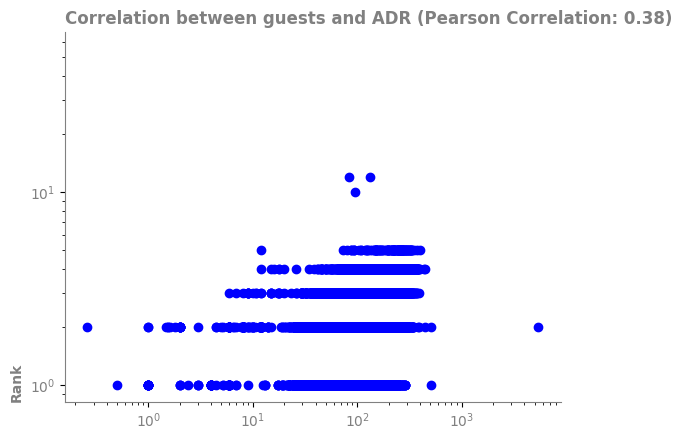

In [19]:
plt.figure()

plt.title('Correlation between guests and ADR (Pearson Correlation: 0.38)', color='gray', loc='left', fontdict={'weight':'bold'})

plt.plot( hotel_df['adr'], hotel_df['family'], 'bo')

plt.yscale('log')
plt.xscale('log')

plt.xlabel('', color='gray', loc='left', fontdict={'weight':'bold'})
plt.ylabel('Rank', color='gray', loc='bottom', fontdict={'weight':'bold'})

plt.xticks(color='gray')
plt.yticks(color='gray')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().spines[['bottom', 'left']].set_color('gray')

plt.show()

According to the correlation rate, فhere is a weak correlation between these two parameters.

### <FONT COLOR="ga3b6f9"> 10.tell about distribution of meals. <FONT/>


In [20]:
country_code_df = pd.read_csv('../data/Country Codes.csv')

In [21]:
merge_hotel_country = pd.merge(hotel_df, country_code_df, left_on='country', right_on='alpha-3')
merge_hotel_country.groupby(['meal', 'region'])['sub-region'].count().reset_index()

,meal,region,sub-region
0,BB,Africa,779
1,BB,Americas,3398
2,BB,Asia,1941
3,BB,Europe,60242
4,BB,Oceania,334
5,FB,Africa,2
6,FB,Americas,3
7,FB,Europe,353
8,HB,Africa,53
9,HB,Americas,135


**Description:**
- BB: Bed & Breakfast.
- HB: Half Board (Breakfast and Dinner normally)
- FB: Full Board (Beakfast, Lunch and Dinner)
- SC: Self Catering.

The results show us european guests spend more money for FB and HB services!